Question 2(A)，part I, II, III and IV

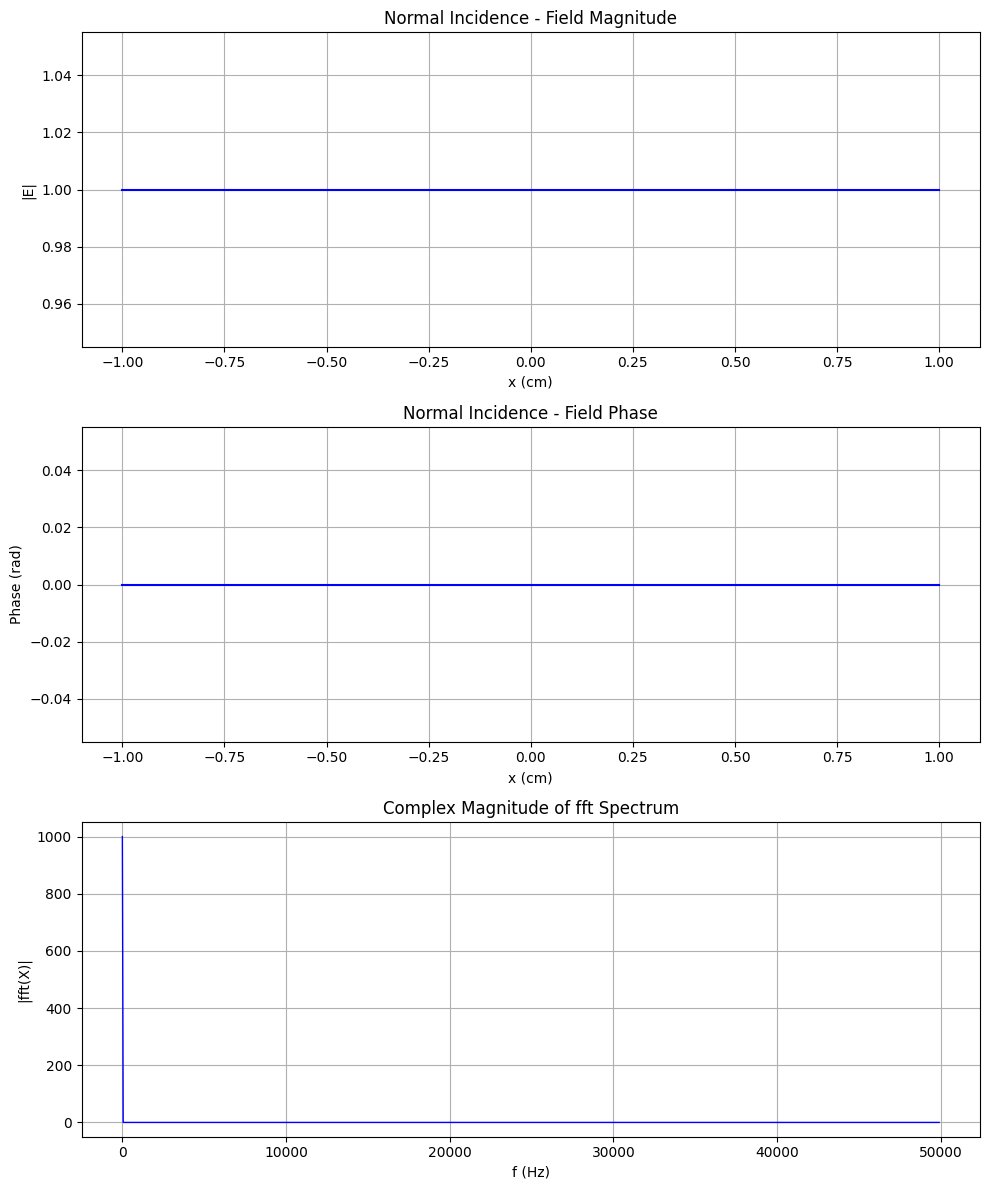


Analysis Summary for θ = 0.000000 rad:
Wavelength: 633.0 nm


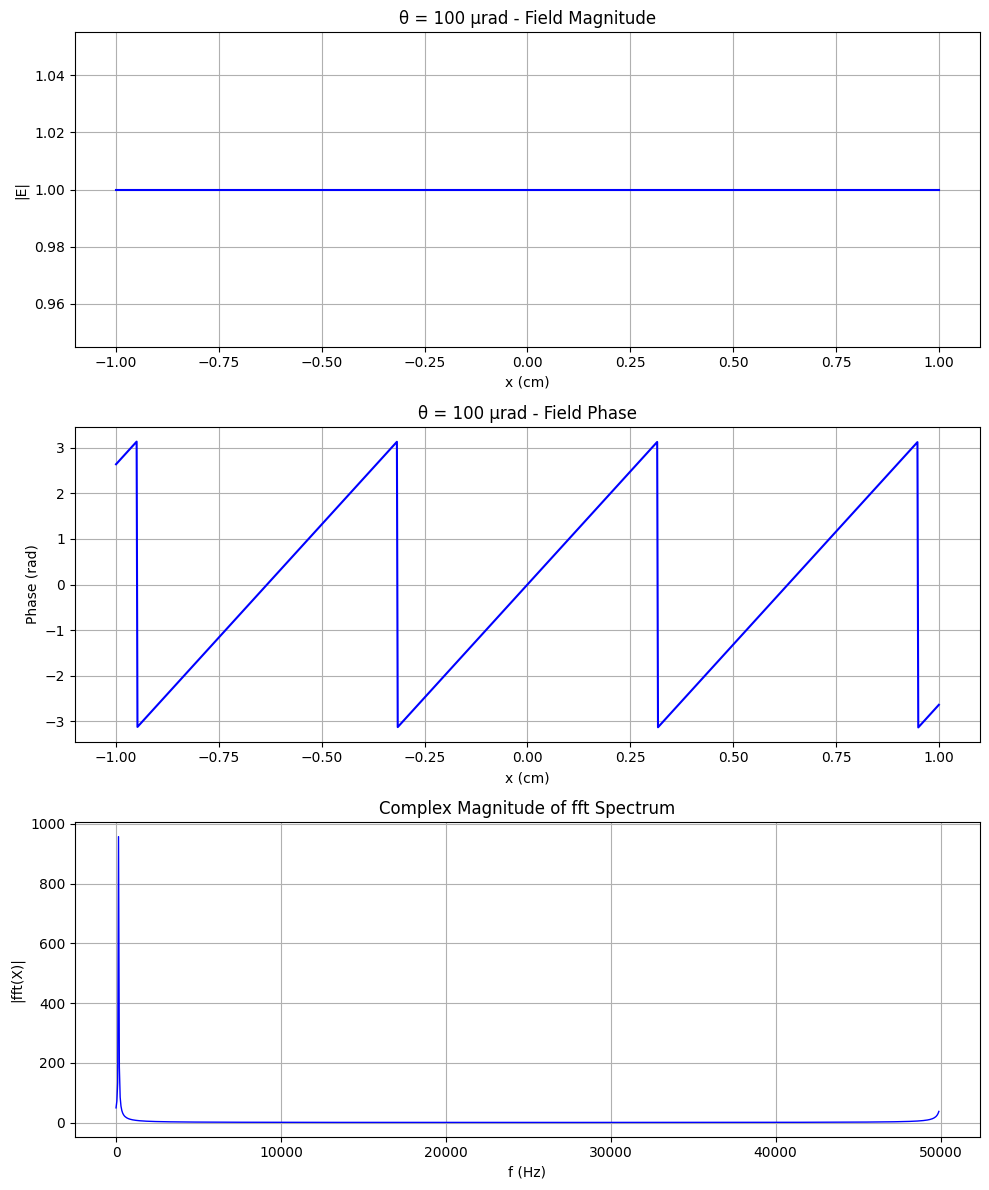


Analysis Summary for θ = 0.000100 rad:
Wavelength: 633.0 nm


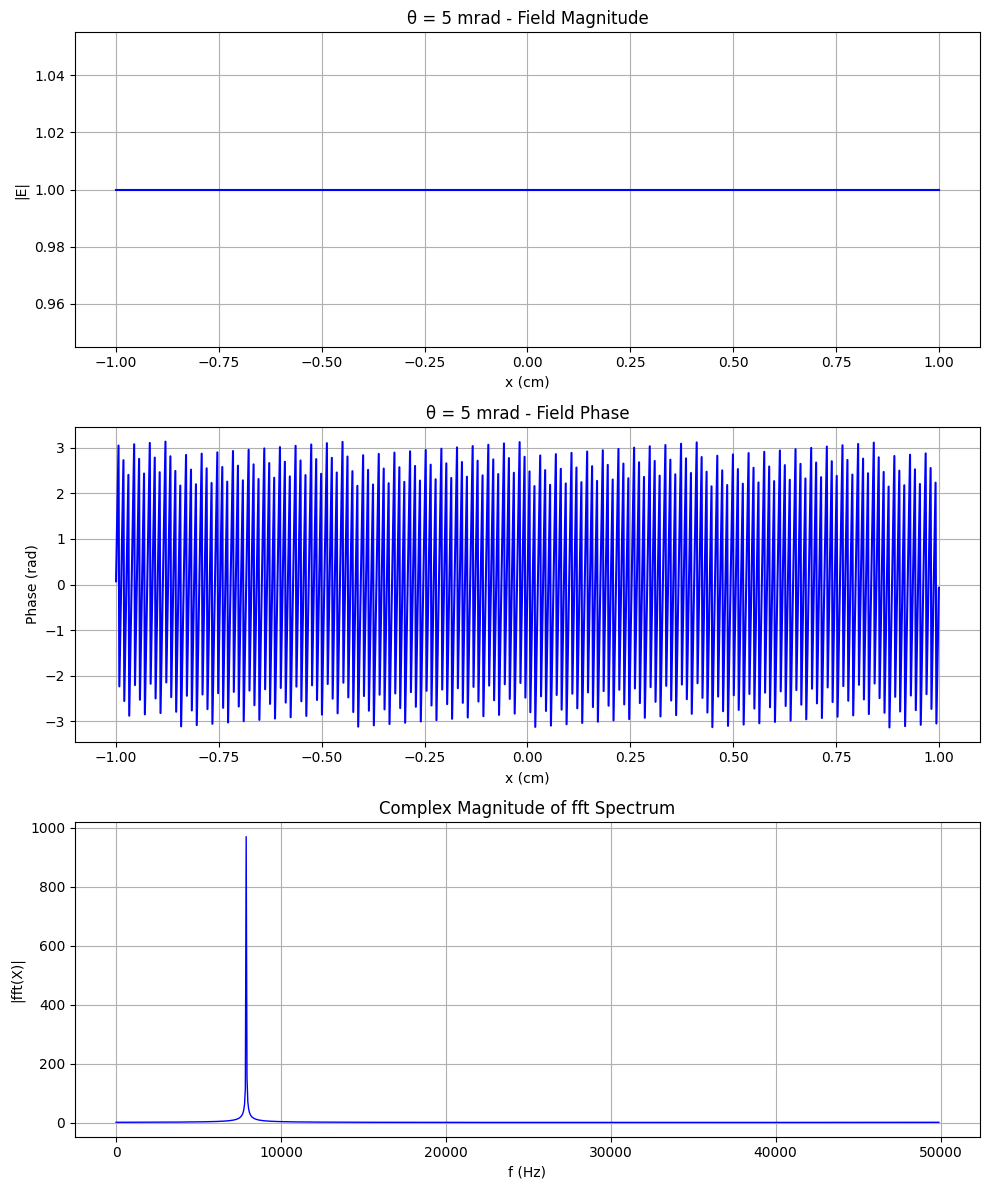


Analysis Summary for θ = 0.005000 rad:
Wavelength: 633.0 nm


In [15]:
import numpy as np
import matplotlib.pyplot as plt

class PlaneWaveAnalyzer:
    def __init__(self, wavelength=633e-9, x_range=(-0.01, 0.01), num_points=1000):
        self.wavelength = wavelength
        self.k = 2 * np.pi / wavelength
        self.x = np.linspace(x_range[0], x_range[1], num_points)
        self.dx = self.x[1] - self.x[0]
        
    def calculate_field(self, theta_rad):
        # Calculate E-field
        kx = self.k * np.sin(theta_rad)
        E = np.exp(1j * kx * self.x)
        
        # Calculate FFT
        L = len(self.x)
        Fs = 1/self.dx  # Sampling frequency
        E_ft = np.fft.fft(E)
        freq = Fs/L * np.arange(L)  # Frequency array following the example format
        
        return E, freq, E_ft, kx

    def plot_analysis(self, theta_rad, title_prefix=""):
        E, freq, E_ft, kx = self.calculate_field(theta_rad)
        
        fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12))
        
        # Field magnitude plot
        ax1.plot(self.x * 100, np.abs(E), 'b-')
        ax1.set_title(f'{title_prefix}Field Magnitude')
        ax1.set_xlabel('x (cm)')
        ax1.set_ylabel('|E|')
        ax1.grid(True)
        
        # Phase plot
        ax2.plot(self.x * 100, np.angle(E), 'b-')
        ax2.set_title(f'{title_prefix}Field Phase')
        ax2.set_xlabel('x (cm)')
        ax2.set_ylabel('Phase (rad)')
        ax2.grid(True)
        
        
        # Fourier transform magnitude plot exactly following the example
        fft_array= np.abs(E_ft)
        ax3.plot(freq, fft_array, 'b-', linewidth=1)
        ax3.set_title('Complex Magnitude of fft Spectrum')
        ax3.set_xlabel('f (Hz)')
        ax3.set_ylabel('|fft(X)|')
        ax3.grid(True)

        

        plt.tight_layout()
        plt.show()
        
        print(f"\nAnalysis Summary for θ = {theta_rad:.6f} rad:")
        print(f"Wavelength: {self.wavelength*1e9:.1f} nm")
        # print(f"peak at{fft_array[np.argmax(fft_array)]}")


# Example usage
analyzer = PlaneWaveAnalyzer()

# Analyze different angles
angles = [0, 100e-6, 5e-3]  # radians
angle_labels = ["Normal Incidence", "θ = 100 µrad", "θ = 5 mrad"]

for angle, label in zip(angles, angle_labels):
    analyzer.plot_analysis(angle, f"{label} - ")

Question 2(B)，part I and II

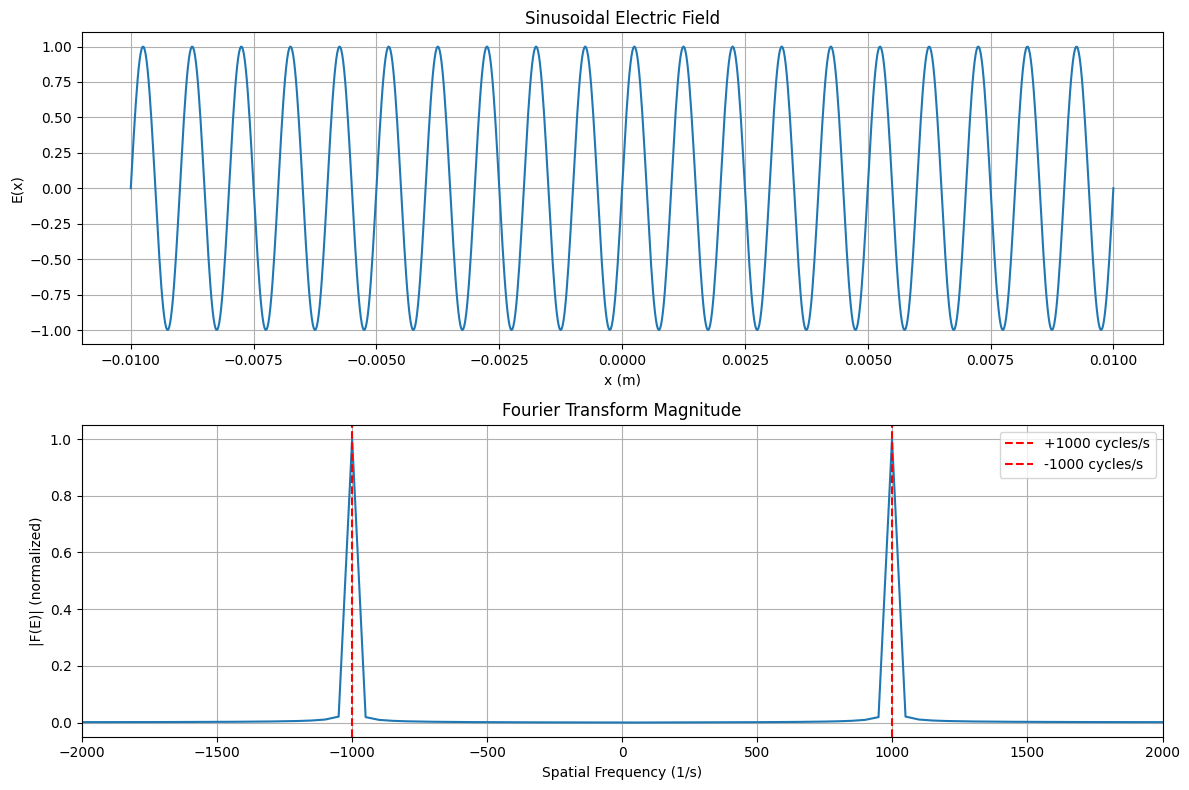

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Spatial grid: -1cm to 1cm with fine sampling
x = np.linspace(-0.01, 0.01, 1000)  # -1cm to 1cm

# Calculate sinusoidal field with 1mm period
# frequency = 1/period = 1000 cycles/meter for 1mm period
f_spatial = 1000  # spatial frequency in cycles/meter
E = np.sin(2 * np.pi * f_spatial * x)

# Calculate Fourier transform
fx = np.fft.fftfreq(len(x), x[1] - x[0])  # Frequency axis
fx = np.fft.fftshift(fx)  # Shift zero frequency to center
E_ft = np.fft.fftshift(np.fft.fft(E))

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot field magnitude
ax1.plot(x , E)  # Convert x to cm for display
ax1.set_title('Sinusoidal Electric Field')
ax1.set_xlabel('x (m)')
ax1.set_ylabel('E(x)')
ax1.grid(True)

# Plot Fourier transform magnitude
ax2.plot(fx, np.abs(E_ft) / np.max(np.abs(E_ft)))  # Normalize magnitude
ax2.set_title('Fourier Transform Magnitude')
ax2.set_xlabel('Spatial Frequency (1/s)')
ax2.set_ylabel('|F(E)| (normalized)')
ax2.grid(True)

# Zoom in on relevant part of Fourier transform
ax2.set_xlim(-2000, 2000)

# Add vertical lines at expected frequency peaks
ax2.axvline(x=f_spatial, color='r', linestyle='--', label=f'+{f_spatial} cycles/s')
ax2.axvline(x=-f_spatial, color='r', linestyle='--', label=f'-{f_spatial} cycles/s')
ax2.legend()

plt.tight_layout()
plt.show()